In [7]:
#d`abord on importe les librairies dont on a besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#creation de data frame
iris = pd.read_csv("iris.data.txt")

In [9]:
#on affiche les 5 premieres instances
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
#on analyse nos donnees
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<AxesSubplot:xlabel='Iris-setosa', ylabel='count'>

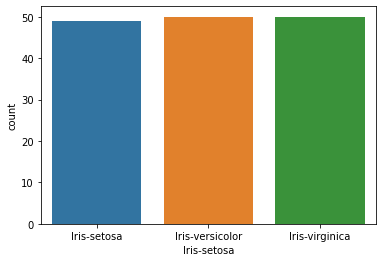

In [14]:
#on voit ici le contenue de la base de donnees en graphiques des differentes classes
sns.countplot(x = "Iris-setosa",data = iris)

In [16]:
iris.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [17]:
X = iris[["5.1","3.5","1.4","0.2"]]
y = iris["Iris-setosa"]

In [18]:
X.head()

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [19]:
y.head(149)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Iris-setosa, Length: 149, dtype: object

In [33]:
#on separe notre data base en sous bases une pour l`entrainement et une autre pour les tests 
#ici pour l`entrainement on prend 66%
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

In [35]:
#on peut visualiser la base de donnees pour l`entrainement
X_train

,5.1,3.5,1.4,0.2
53,6.5,2.8,4.6,1.5
106,7.3,2.9,6.3,1.8
78,5.7,2.6,3.5,1.0
37,4.4,3.0,1.3,0.2
39,5.0,3.5,1.3,0.3
...,...,...,...,...
63,5.6,2.9,3.6,1.3
70,6.1,2.8,4.0,1.3
81,5.8,2.7,3.9,1.2
11,4.8,3.0,1.4,0.1


In [36]:
y_train


53     Iris-versicolor
106     Iris-virginica
78     Iris-versicolor
37         Iris-setosa
39         Iris-setosa
            ...       
63     Iris-versicolor
70     Iris-versicolor
81     Iris-versicolor
11         Iris-setosa
95     Iris-versicolor
Name: Iris-setosa, Length: 99, dtype: object

In [37]:
#puis on va faire la mise a l`echelle des donnees avec une standardisation
from sklearn.preprocessing import StandardScaler


In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(X_train)

StandardScaler()

In [40]:
#on peut ressortir la moyenne et la variance de chaque variables
print(scaler.mean_)
print(scaler.var_)

[5.88787879 3.06868687 3.82929293 1.24747475]
[0.7481359  0.16356494 3.30510152 0.64410978]


In [41]:
#on va transformer les valeurs de la base de donnees xtrain et xtest 
#a partir du model de la base de donnees d`entainement
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [42]:
#on aurras des donnees de type numpy donc il faut les transformer en dataframe
column_list = X_train.columns
column_list

Index(['5.1', '3.5', '1.4', '0.2'], dtype='object')

In [43]:
X_train_scaled = pd.DataFrame(data = X_train_norm,columns = column_list)
X_test_scaled = pd.DataFrame(data = X_test_norm,columns = column_list)

In [44]:
X_train_scaled.head()

,5.1,3.5,1.4,0.2
0,0.707697,-0.664357,0.423933,0.314648
1,1.632607,-0.417096,1.359029,0.688450
2,-0.217214,-1.158878,-0.181130,-0.308355
3,-1.720194,-0.169836,-1.391255,-1.305160
4,-1.026511,1.066467,-1.391255,-1.180559


In [45]:
X_train_scaled.describe()
#on voit clairement la moyenne apres etre standardisee elle devient 0 et la variance a 1

,5.1,3.5,1.4,0.2
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,2.312965e-16,2.214278e-15,1.376564e-16,9.546236e-17
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00
min,-1.835807e+00,-2.642441e+00,-1.501266e+00,-1.429760e+00
25%,-9.108968e-01,-6.643567e-01,-1.281244e+00,-1.180559e+00
50%,-1.016000e-01,-1.698356e-01,3.689270e-01,1.900473e-01
75%,7.076967e-01,6.955765e-01,7.814697e-01,8.130502e-01
max,2.326290e+00,3.291813e+00,1.689064e+00,1.560654e+00


In [46]:
#on passe a l`application du classifier de KNN
from sklearn.neighbors import KNeighborsClassifier

In [47]:
KNN = KNeighborsClassifier(n_neighbors = 1)

In [48]:
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
#puis on va faire maintenant la prediction et l`evaluation
y_pred = KNN.predict(X_test_scaled)

In [50]:
#maimtenant on evalue notre algorythm
from sklearn import metrics

In [51]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.86      0.90      0.88        21
 Iris-virginica       0.83      0.77      0.80        13

       accuracy                           0.90        50
      macro avg       0.90      0.89      0.89        50
   weighted avg       0.90      0.90      0.90        50

[[16  0  0]
 [ 0 19  2]
 [ 0  3 10]]


<function matplotlib.pyplot.show(close=None, block=None)>

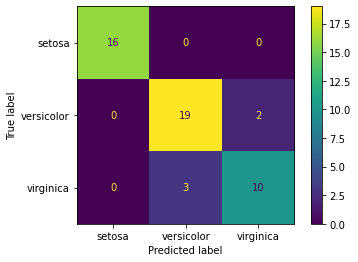

In [52]:
#affichage de la matrice de confusion autrement et plus clairement
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["setosa","versicolor","virginica"])
cm_display.plot()
plt.show

In [53]:
#la performance totale de l`algorythm est de 90% 
metrics.accuracy_score(y_test, y_pred)

0.9

In [60]:
# pour la derniere etape on verras comment choisir notre k donc la meilleure valeur de k
#explication : cet algorythm permetde calculer l`erreur en faisant une prediction, puis
#on calcul la moyenne de tous les points different entre leur prediction et la vrai valeur test
#donc c`est la somme des mauvaises predictions/la somme total des predictions.
vect_error = []
for k in range (1,41):
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train_scaled,y_train)
    y_pred = KNN.predict(X_test_scaled)
    error = np.mean(y_pred != y_test)# = somme des mauvaises predictions/la somme total des predictions
    vect_error.append(error)

In [61]:
print(vect_error)

[0.1, 0.12, 0.08, 0.1, 0.08, 0.08, 0.08, 0.06, 0.02, 0.04, 0.04, 0.04, 0.06, 0.08, 0.08, 0.08, 0.06, 0.08, 0.08, 0.12, 0.14, 0.14, 0.18, 0.16, 0.16, 0.16, 0.16, 0.14, 0.18, 0.18, 0.18, 0.16, 0.16, 0.16, 0.16, 0.16, 0.2, 0.2, 0.2, 0.2]


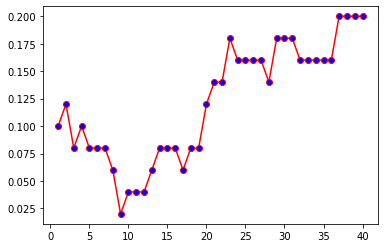

In [62]:
# creation du graphique des erreurs en fonction des k
plt.plot(range(1,41),vect_error,marker = "o", color = "red", markerfacecolor = "blue")

In [63]:
# ici la valeur de k optimal est k = 9 :
minimum = np.argmin(vect_error)
print(minimum + 1)


9
